##Importing all necessary libraries

In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

##Mounting Google Drive to Import Dataset from Google Drive

In [2]:
from google.colab import drive
import io
drive.mount('/content/drive')

Mounted at /content/drive


##Importing Dataset

In [3]:
data = pd.read_csv('Your File path')
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


##Analyzing Data

In [4]:
data.head().style.background_gradient(cmap = "viridis")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [6]:
data.shape

(4340, 8)

In [7]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [8]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
data.describe().style.background_gradient(cmap = "viridis")

,year,selling_price,km_driven
count,4340.000000,4340.000000,4340.000000
mean,2013.090783,504127.311751,66215.777419
std,4.215344,578548.736139,46644.102194
min,1992.000000,20000.000000,1.000000
25%,2011.000000,208749.750000,35000.000000
50%,2014.000000,350000.000000,60000.000000
75%,2016.000000,600000.000000,90000.000000
max,2020.000000,8900000.000000,806599.000000


##Number of Rows in Data and Columns in Data

In [10]:
print("The number of rows in train data is {0}, and the number of columns in train data is {1}".format(data.shape[0], data.shape[1]))

The number of rows in train data is 4340, and the number of columns in train data is 8


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


##To Find Out the age of the cars we're gonna add another column and the value of that column will be `Current Year` - `Manufacturing Year` = `Age` 

In [12]:
data["car_age"] = (datetime.datetime.now().year) - (data["year"])

In [13]:
data.head().style.background_gradient(cmap = "viridis")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8


##Checking the distributions of `Categorical Data`

In [14]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_age'],
      dtype='object')

In [15]:
print(data.fuel.value_counts())
print(data.seller_type.value_counts())
print(data.transmission.value_counts())
print(data.owner.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


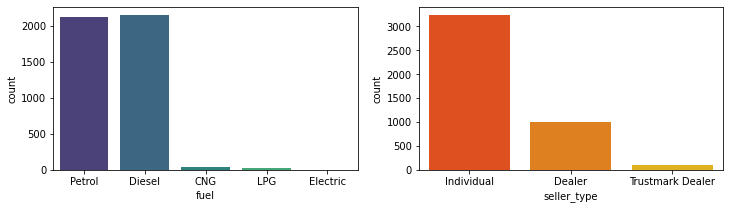

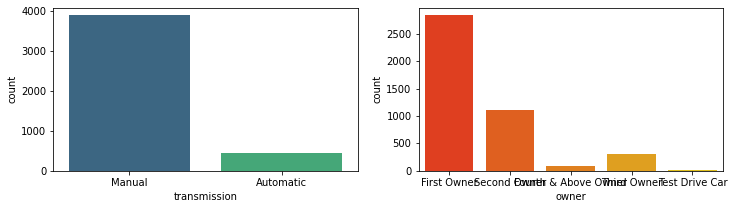

In [16]:
cat_col = ['fuel','seller_type','transmission','owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[12,3])
 
    plt.subplot(1,2,1)
    sns.countplot(x=cat_col[i], data=data,palette='viridis')
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_col[i], data=data,palette='autumn')
    i += 1
    
    plt.show()

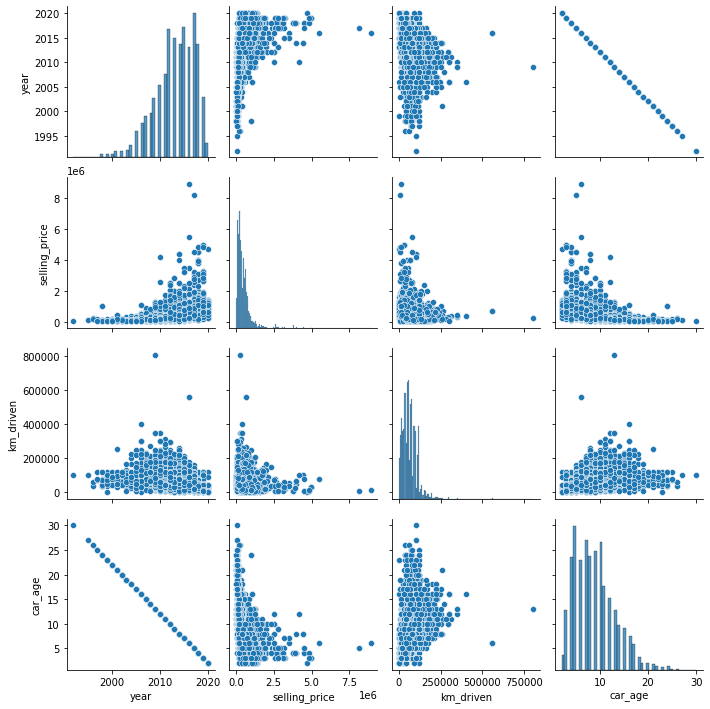

In [17]:
sns.pairplot(data)
plt.show()

##Creating a HeatMap

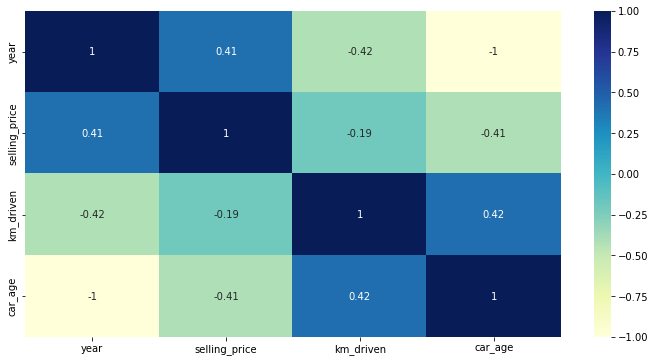

In [18]:
correlations = data.corr()
index=correlations.index
plt.figure(figsize=(12,6))
sns.heatmap(data[index].corr(),annot=True,cmap="YlGnBu")

##Adding a column with car brand name to see number of cars by brand

In [19]:
#create 'car_brand_name' feature from 'name' feature

data["car_brand_name"] = data["name"].str.extract('([^\s]+)')
data["car_brand_name"] = data["car_brand_name"].astype("category")

In [20]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,car_brand_name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,15,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,15,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,10,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,5,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8,Honda


In [21]:
data.car_brand_name.value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
Name: car_brand_name, dtype: int64

##Now dropping all columns that are unnecessary

In [22]:
data.drop(["year"],axis=1,inplace=True)
data.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,car_brand_name
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,15,Maruti
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,15,Maruti
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,10,Hyundai
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,5,Datsun
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,8,Honda


##Changing categorical Values to Numerical Values


In [23]:
data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
data.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)
data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [24]:
data.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,car_brand_name
0,Maruti 800 AC,60000,70000,0,1,0,0,15,Maruti
1,Maruti Wagon R LXI Minor,135000,50000,0,1,0,0,15,Maruti
2,Hyundai Verna 1.6 SX,600000,100000,1,1,0,0,10,Hyundai
3,Datsun RediGO T Option,250000,46000,0,1,0,0,5,Datsun
4,Honda Amaze VX i-DTEC,450000,141000,1,1,0,1,8,Honda


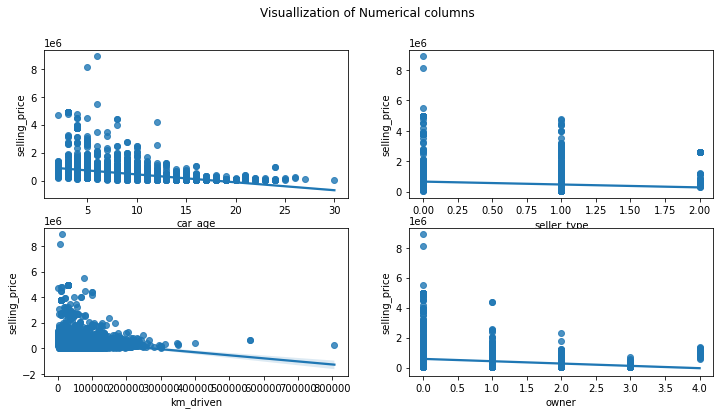

In [25]:
fig, axes = plt.subplots(2, 2, figsize = (12,6))
fig.suptitle('Visuallization of Numerical columns')

sns.regplot(x = 'car_age', y = 'selling_price', data = data, ax = axes[0,0])
sns.regplot(x = 'seller_type', y = 'selling_price', data = data, ax = axes[0,1])
sns.regplot(x = 'km_driven', y = 'selling_price', data = data, ax = axes[1,0])
sns.regplot(x = 'owner', y = 'selling_price', data = data, ax = axes[1,1])

#Now, Creating the data to train and test

In [26]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#create column trasnformer
ct = make_column_transformer(
    (MinMaxScaler(),["km_driven",	"fuel",	"seller_type",	"transmission"	,"owner",	"car_age"	]),
)

#Creating x and y
x = data.drop(['name','selling_price','car_brand_name'],axis=1)
y = data['selling_price']

#Build our train and test sets()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

#Fit column transformer on the trainning data only.(doing so on test data would result in data leakage)
ct.fit(x_train)

#Transform trainning and test_data with normalization (MinMaxScaler) and one hot encoding(OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

##Building the model

In [65]:
#1.) Creating the model
price_prediction=tf.keras.Sequential([
    tf.keras.layers.Dense(10000,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

#2.) Model Compile
price_prediction.compile(loss=tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                         metrics=["mae"])

#3.) Fit the model
history_price = price_prediction.fit(x_train_normal,y_train,epochs=250,verbose=0)

In [66]:
# from sklearn.linear_model import LinearRegression
# from sklearn import metrics

# lin_reg_model = LinearRegression()
# lin_reg_model.fit(x_train,y_train)


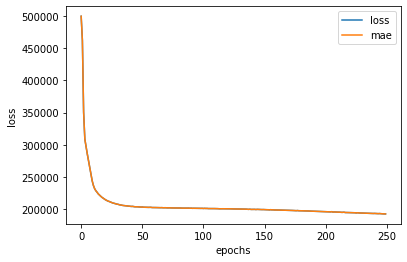

In [67]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_price.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [68]:
evaluated_value = price_prediction.evaluate(x_test_normal,y_test)

28/28 [==============================] - 0s 2ms/step - loss: 187215.9688 - mae: 187215.9688


In [69]:
predicted_value = price_prediction.predict(x_test_normal)
#e = lin_reg_model.predict(x_test)

In [70]:
from sklearn import metrics
error_score = metrics.r2_score(y_test, predicted_value)
print("R squared Error : ", error_score)

R squared Error :  0.5568379421510679


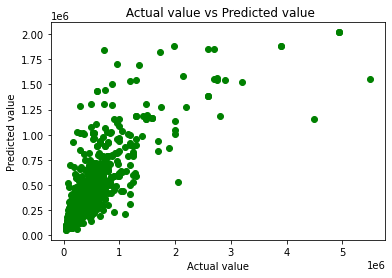

In [71]:
plt.scatter(y_test, predicted_value,color='green')
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title(" Actual value vs Predicted value")
plt.show()